24.09.04 - Dissertation - Identifying Deprivation in Clinical Research: Predictive Modeling of Poverty-Related Disparities and Underrepresentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
file_path = "C:/Users/rakitic/Desktop/DURHAM/project/project0802/JEanon.xlsx"
data = pd.read_excel(file_path, sheet_name='Data2')

In [3]:
data

,CaPE Patient Number,IMDr,IMDdec,Return Visit,sex,Age,Unnamed: 6,Source of Referral,GP Practice,PCN,...,PAX/ASCEnD#,for coding.1,date randomised,Research Study2,Assessment Letter sent to GP/Pt.,Discharged?,discharge-first appt,Discharged to?,Sharing Notes,Unnamed: 49
0,1,15140.0,5.0,No,F,40.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-03-18 00:00:00,36,Primary,NaN,yes
1,2,6438.0,2.0,No,F,39.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-09 00:00:00,33,Primary,NaN,NaN
2,3,3138.0,1.0,No,M,32.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-12 00:00:00,36,Primary,NaN,NaN
3,4,10676.0,4.0,No,F,29.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-10 00:00:00,21,Secondary,"Probable bipolar, on valproate (prescribed by GP)",NaN
4,5,10540.0,4.0,No,F,32.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-06-01 00:00:00,41,Primary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,last pre-fill,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Select Dataset for Population C & Population C'</h1>

In [4]:
filtered_data_nop  = data[
    ((data.iloc[:, 13].str.lower() == 'yes')) |
    ((data.iloc[:, 14].str.lower() == 'yes')) |
    ((data.iloc[:, 15].str.lower() == 'yes'))
]

filtered_data_nop #Population C'

,CaPE Patient Number,IMDr,IMDdec,Return Visit,sex,Age,Unnamed: 6,Source of Referral,GP Practice,PCN,...,PAX/ASCEnD#,for coding.1,date randomised,Research Study2,Assessment Letter sent to GP/Pt.,Discharged?,discharge-first appt,Discharged to?,Sharing Notes,Unnamed: 49
0,1,15140.0,5.0,No,F,40.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-03-18 00:00:00,36,Primary,NaN,yes
1,2,6438.0,2.0,No,F,39.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-09 00:00:00,33,Primary,NaN,NaN
2,3,3138.0,1.0,No,M,32.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-12 00:00:00,36,Primary,NaN,NaN
3,4,10676.0,4.0,No,F,29.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-10 00:00:00,21,Secondary,"Probable bipolar, on valproate (prescribed by GP)",NaN
4,5,10540.0,4.0,No,F,32.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-06-01 00:00:00,41,Primary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,484,30017.0,10.0,No,F,58.0,True,PIC,Forest Hall,N West (N Tyne),...,NaN,1,NaN,1,1,RiO not completed,0,1,NaN,NaN
500,492,21175.0,7.0,No,M,65.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,still in process,NaN,letter not done,not sent to Pam,RiO not completed,letter not done,1,NaN,NaN
514,506,22505.0,7.0,No,M,36.0,True,Interface,Swarland Avenue S,N West (N Tyne),...,PD-CN-030,randomised/eligible,2024-03-14 00:00:00,Nil appropriate,Yes,held in CaPE,held in CaPE,held in CaPE,NaN,NaN
515,507,NaN,NaN,No,F,32.0,True,Interface,Wellspring MP,N West (N Tyne),...,NaN,1,NaN,Nil appropriate,Yes,held in CaPE,held in CaPE,held in CaPE,NaN,NaN


In [5]:
# Filter rows where column AE has 'Yes', 'yes', or 1
filtered_data_ae = data[data.iloc[:, 30].isin(['Yes', 'yes', 1])]
filtered_data_ae #Population C

,CaPE Patient Number,IMDr,IMDdec,Return Visit,sex,Age,Unnamed: 6,Source of Referral,GP Practice,PCN,...,PAX/ASCEnD#,for coding.1,date randomised,Research Study2,Assessment Letter sent to GP/Pt.,Discharged?,discharge-first appt,Discharged to?,Sharing Notes,Unnamed: 49
0,1,15140.0,5.0,No,F,40.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-03-18 00:00:00,36,Primary,NaN,yes
1,2,6438.0,2.0,No,F,39.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-09 00:00:00,33,Primary,NaN,NaN
2,3,3138.0,1.0,No,M,32.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-12 00:00:00,36,Primary,NaN,NaN
3,4,10676.0,4.0,No,F,29.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-10 00:00:00,21,Secondary,"Probable bipolar, on valproate (prescribed by GP)",NaN
4,5,10540.0,4.0,No,F,32.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-06-01 00:00:00,41,Primary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,475,31549.0,10.0,No,M,33.0,True,Self,The Grove MG,Jesmond Lower/Gosforth,...,NaN,declined,NaN,COMP006 referred,Yes,held in CaPE,held in CaPE,held in CaPE,IPT to start 15/04/24. Then COMP006,NaN
492,484,30017.0,10.0,No,F,58.0,True,PIC,Forest Hall,N West (N Tyne),...,NaN,1,NaN,1,1,RiO not completed,0,1,NaN,NaN
500,492,21175.0,7.0,No,M,65.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,still in process,NaN,letter not done,not sent to Pam,RiO not completed,letter not done,1,NaN,NaN
514,506,22505.0,7.0,No,M,36.0,True,Interface,Swarland Avenue S,N West (N Tyne),...,PD-CN-030,randomised/eligible,2024-03-14 00:00:00,Nil appropriate,Yes,held in CaPE,held in CaPE,held in CaPE,NaN,NaN


<h1>Compare Population C and Population C' </h1>

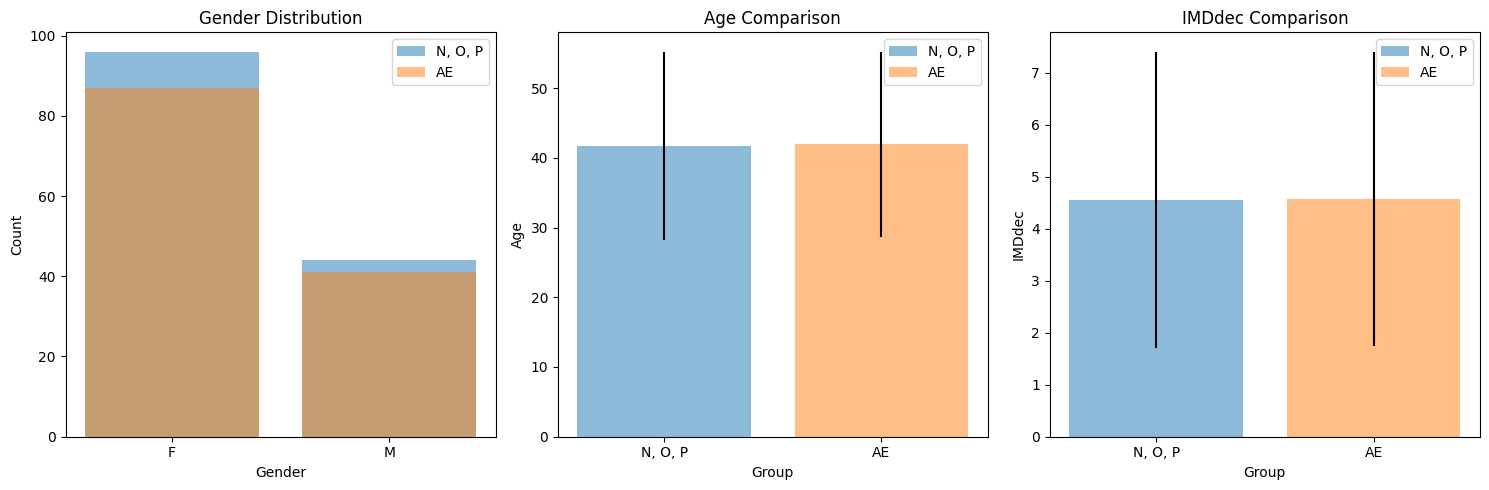

In [6]:
# Preperation for data
nop_gender_counts = filtered_data_nop['sex'].value_counts()
ae_gender_counts = filtered_data_ae['sex'].value_counts()

nop_age_stats = filtered_data_nop['Age'].describe()
ae_age_stats = filtered_data_ae['Age'].describe()

nop_imddec_stats = filtered_data_nop['IMDdec'].describe()
ae_imddec_stats = filtered_data_ae['IMDdec'].describe()

# Gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(nop_gender_counts.index, nop_gender_counts.values, alpha=0.5, label='N, O, P')
plt.bar(ae_gender_counts.index, ae_gender_counts.values, alpha=0.5, label='AE')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.legend()

# Age
plt.subplot(1, 3, 2)
plt.bar(['N, O, P'], [nop_age_stats['mean']], yerr=[nop_age_stats['std']], alpha=0.5, label='N, O, P')
plt.bar(['AE'], [ae_age_stats['mean']], yerr=[ae_age_stats['std']], alpha=0.5, label='AE')
plt.xlabel('Group')
plt.ylabel('Age')
plt.title('Age Comparison')
plt.legend()

# IMDdec
plt.subplot(1, 3, 3)
plt.bar(['N, O, P'], [nop_imddec_stats['mean']], yerr=[nop_imddec_stats['std']], alpha=0.5, label='N, O, P')
plt.bar(['AE'], [ae_imddec_stats['mean']], yerr=[ae_imddec_stats['std']], alpha=0.5, label='AE')
plt.xlabel('Group')
plt.ylabel('IMDdec')
plt.title('IMDdec Comparison')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
merged_df = pd.concat([filtered_data_nop, filtered_data_ae])
merged_df.drop_duplicates()

,CaPE Patient Number,IMDr,IMDdec,Return Visit,sex,Age,Unnamed: 6,Source of Referral,GP Practice,PCN,...,PAX/ASCEnD#,for coding.1,date randomised,Research Study2,Assessment Letter sent to GP/Pt.,Discharged?,discharge-first appt,Discharged to?,Sharing Notes,Unnamed: 49
0,1,15140.0,5.0,No,F,40.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-03-18 00:00:00,36,Primary,NaN,yes
1,2,6438.0,2.0,No,F,39.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-09 00:00:00,33,Primary,NaN,NaN
2,3,3138.0,1.0,No,M,32.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-12 00:00:00,36,Primary,NaN,NaN
3,4,10676.0,4.0,No,F,29.0,True,Primary,Newburn,Outer West,...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-05-10 00:00:00,21,Secondary,"Probable bipolar, on valproate (prescribed by GP)",NaN
4,5,10540.0,4.0,No,F,32.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,Nil appropriate,NaN,Nil appropriate,Yes,2022-06-01 00:00:00,41,Primary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,484,30017.0,10.0,No,F,58.0,True,PIC,Forest Hall,N West (N Tyne),...,NaN,1,NaN,1,1,RiO not completed,0,1,NaN,NaN
500,492,21175.0,7.0,No,M,65.0,True,Primary,Forest Hall,N West (N Tyne),...,NaN,still in process,NaN,letter not done,not sent to Pam,RiO not completed,letter not done,1,NaN,NaN
514,506,22505.0,7.0,No,M,36.0,True,Interface,Swarland Avenue S,N West (N Tyne),...,PD-CN-030,randomised/eligible,2024-03-14 00:00:00,Nil appropriate,Yes,held in CaPE,held in CaPE,held in CaPE,NaN,NaN
515,507,NaN,NaN,No,F,32.0,True,Interface,Wellspring MP,N West (N Tyne),...,NaN,1,NaN,Nil appropriate,Yes,held in CaPE,held in CaPE,held in CaPE,NaN,NaN


<h1>Create a new label to distinguish between participants and non-participants in clinical research. </h1>

In [8]:
# Define the parameters in the AR and AP columns that represent research participants.
research_participation_ar_values = ['SCiD randomised', 'Referred to SCiD', 'COMP006 referred', 1]
research_participation_ap_values = ['randomised/eligible', 1]

# Define a list of uncertain conditions that should be removed
uncertain_conditions = ['still in process', 'SCiD screening booked']

def seperate_label(df):
    copy_df = df.copy()

    # Remove rows where these uncertain conditions
    copy_df = copy_df[~copy_df.iloc[:, 41].isin(uncertain_conditions)]
    copy_df = copy_df[~copy_df.iloc[:, 43].isin(uncertain_conditions)]
    
    copy_df['ResearchParticipation'] = copy_df.apply(
    lambda row: 1 if (row.iloc[43] in research_participation_ar_values or row.iloc[41] in research_participation_ap_values) else 0,
    #lambda row: 1 if (row.iloc[41] in research_participation_ap_values) else 0,
    axis=1
)
    return copy_df

data2_ae = seperate_label(filtered_data_ae)
data2_nop = seperate_label(filtered_data_nop)


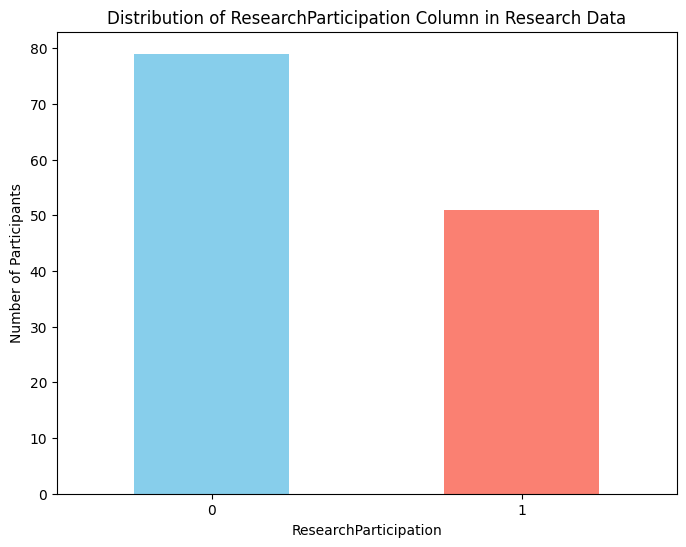

In [9]:
plt.figure(figsize=(8, 6))
data2_nop['ResearchParticipation'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('ResearchParticipation')
plt.ylabel('Number of Participants')
plt.title('Distribution of ResearchParticipation Column in Research Data')
plt.xticks(rotation=0)
plt.show()

In [10]:
len(data2_nop[data2_nop['ResearchParticipation']==1])

51

<h1>Convert categorical data to numerical encoding</h1>

In [11]:
deprivation_and_baseline_vars = ['IMDdec', 'ethnicity', 'sex', 'Age']
deprivation_baseline_data = data2_nop[['ResearchParticipation'] + deprivation_and_baseline_vars]
# '0-35' for young adults, '35-55' for middle-aged adults, and '55+' for older adults
deprivation_baseline_data['AgeGroup'] = pd.cut(deprivation_baseline_data['Age'], bins=[0, 29, 49, 100], labels=['0-29', '30-49', '50+'])


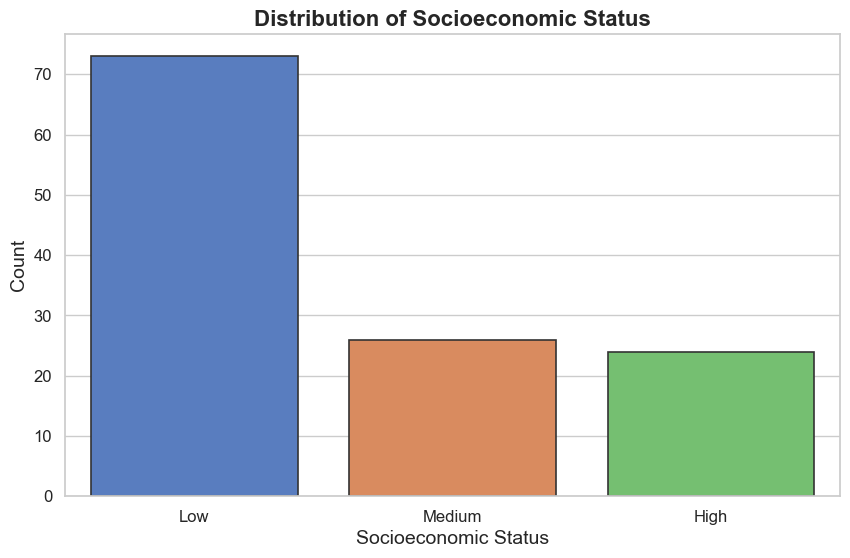

In [12]:
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
deprivation_baseline_data['Socioeconomic_Status'] = pd.cut(deprivation_baseline_data['IMDdec'], bins=bins, labels=labels, include_lowest=True)

# Set the style to match the previous plots
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Socioeconomic_Status', 
    data=deprivation_baseline_data, 
    palette='muted',  
    edgecolor=".2",   
    linewidth=1.2     
)

# Add labels and title with formatting
plt.title('Distribution of Socioeconomic Status', fontsize=16, fontweight='bold')
plt.xlabel('Socioeconomic Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.savefig('C:/Users/rakitic/Desktop/DURHAM/project/0828/FIGURE/DistributionofSocioeconomicStatus.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

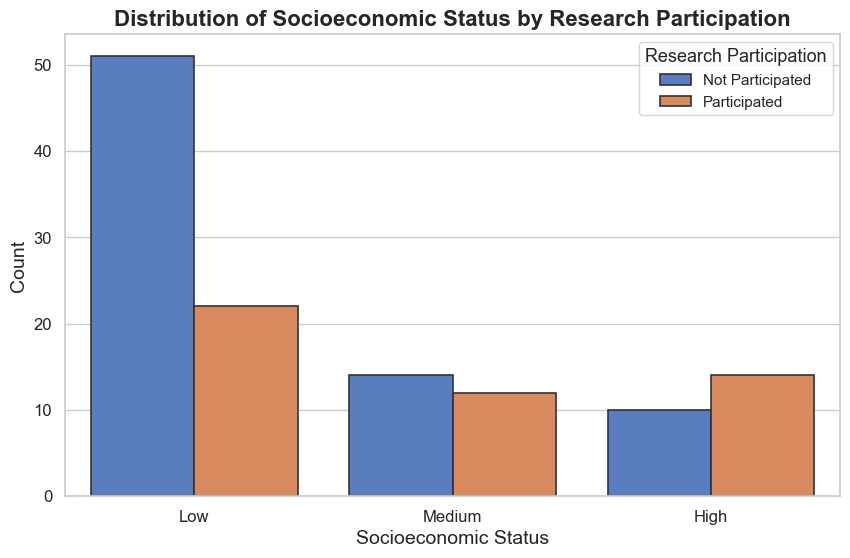

In [13]:
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
deprivation_baseline_data['Socioeconomic_Status'] = pd.cut(deprivation_baseline_data['IMDdec'], bins=bins, labels=labels, include_lowest=True)

# Set the style to match the previous plots
sns.set(style="whitegrid")

# Create the count plot with hue for participation
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Socioeconomic_Status', 
    hue='ResearchParticipation', 
    data=deprivation_baseline_data, 
    palette='muted',  
    edgecolor=".2",  
    linewidth=1.2     
)

# Add labels and title with formatting
plt.title('Distribution of Socioeconomic Status by Research Participation', fontsize=16, fontweight='bold')
plt.xlabel('Socioeconomic Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust the legend to match the previous style
plt.legend(title='Research Participation', labels=['Not Participated', 'Participated'], title_fontsize='13', fontsize='11')

# Adjust tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.savefig('C:/Users/rakitic/Desktop/DURHAM/project/0828/FIGURE/DistributionofSocioeconomicStatus.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [14]:
#PROCESS WITH missing_values IN ethnicity
missing_values = ['Not known/not stated', "RNA'd", 'UTC', 'NYA', pd.NA, None]
deprivation_baseline_data['ethnicity'] = deprivation_baseline_data['ethnicity'].replace(missing_values, pd.NA)

white_categories = [
    '1','White', 'White - English/Welsh/Scottish/Northern Irish/British Irish','White - Any other white background'
]

deprivation_baseline_data['ethnicity'] = deprivation_baseline_data['ethnicity'].apply(
    lambda x: 'White' if pd.notna(x) and x in white_categories else ('Other-White' if pd.notna(x) else pd.NA)
)

In [15]:
deprivation_baseline_data['ethnicity']

0      White
1       <NA>
2      White
3      White
4       <NA>
       ...  
483    White
492    White
514    White
515    White
516    White
Name: ethnicity, Length: 130, dtype: object

In [16]:
#deprivation_baseline_data.to_excel("C:/Users/rakitic/Desktop/DURHAM/project/project0802/deprivationData.xlsx", index=False)

In [17]:
#categorical features
categorical_features = ['sex', 'AgeGroup', 'ethnicity','Socioeconomic_Status']
for feature in categorical_features:
    deprivation_baseline_data[feature],_ = pd.factorize(deprivation_baseline_data[feature])

In [18]:
numerical_features = ['ethnicity', 'IMDdec', 'Age','Socioeconomic_Status'] + categorical_features

In [19]:
deprivation_baseline_data = deprivation_baseline_data.replace(-1, pd.NA)
deprivation_baseline_data = deprivation_baseline_data.applymap(lambda x: pd.NA if pd.isna(x) else x)
#deprivation_baseline_data = deprivation_baseline_data.dropna()
deprivation_baseline_data

,ResearchParticipation,IMDdec,ethnicity,sex,Age,AgeGroup,Socioeconomic_Status
0,0,5.0,0,0,40.0,0,0
1,0,2.0,<NA>,0,39.0,0,1
2,0,1.0,0,1,32.0,0,1
3,0,4.0,0,0,29.0,1,1
4,0,4.0,<NA>,0,32.0,0,1
...,...,...,...,...,...,...,...
483,1,10.0,0,1,33.0,0,2
492,1,10.0,0,0,58.0,2,2
514,1,7.0,0,1,36.0,0,0
515,1,<NA>,0,0,32.0,0,<NA>


<h1>data analysis</h1>

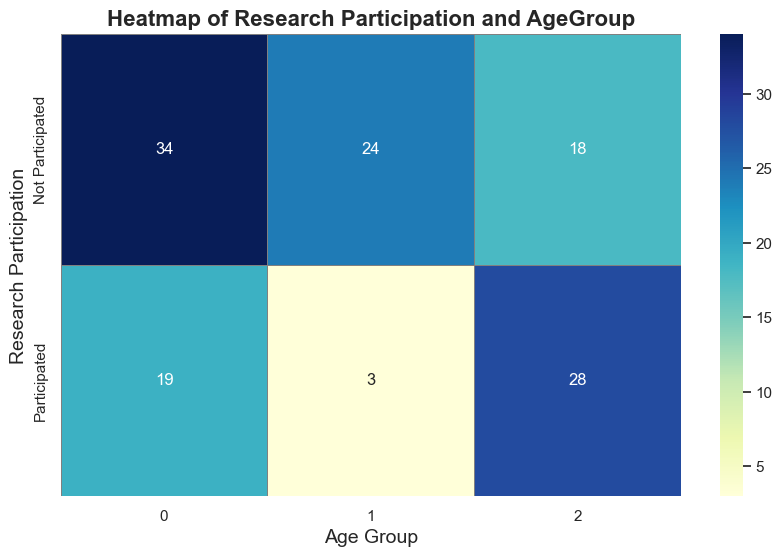

In [20]:
sns.set(style="whitegrid")

# Generate the crosstab for Research Participation and AgeGroup
crosstab = pd.crosstab(deprivation_baseline_data['ResearchParticipation'], deprivation_baseline_data['AgeGroup'])

# Rename the index to reflect 'Not Participated' and 'Participated'
crosstab.index = ['Not Participated', 'Participated']

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, linecolor='gray')

plt.title('Heatmap of Research Participation and AgeGroup', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Research Participation', fontsize=14)

#plt.savefig('C:/Users/rakitic/Desktop/DURHAM/project/0828/FIGURE/HeatmapResearchParticipationandAgeGroup.png', dpi=300, bbox_inches='tight')

plt.show()

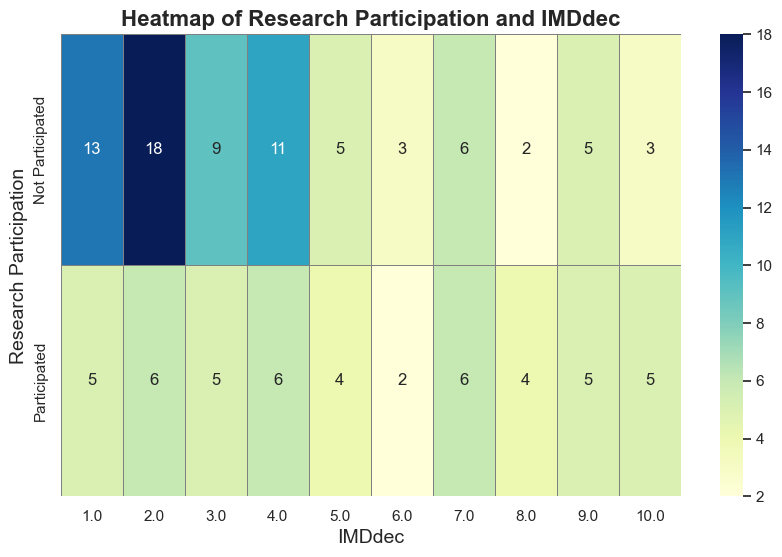

In [21]:
sns.set(style="whitegrid")

deprivation_baseline_data['IMDdec'] = pd.to_numeric(deprivation_baseline_data['IMDdec'])

# Generate the crosstab for Research Participation and IMDdec
crosstab = pd.crosstab(deprivation_baseline_data['ResearchParticipation'], deprivation_baseline_data['IMDdec'])
crosstab.index = ['Not Participated', 'Participated']

# Sort the columns in ascending order
crosstab = crosstab.reindex(sorted(crosstab.columns), axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, linecolor='gray')

plt.title('Heatmap of Research Participation and IMDdec', fontsize=16, fontweight='bold')
plt.xlabel('IMDdec', fontsize=14)
plt.ylabel('Research Participation', fontsize=14)

#plt.savefig('C:/Users/rakitic/Desktop/DURHAM/project/0828/FIGURE/HeatmapResearchParticipationandIMDdec.png', dpi=300, bbox_inches='tight')

plt.show()

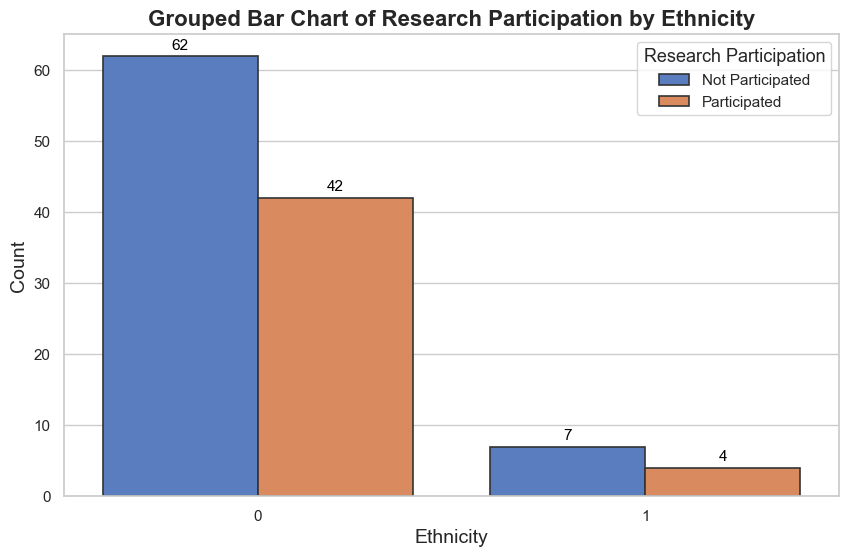

In [22]:
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='ethnicity', 
    hue='ResearchParticipation', 
    data=deprivation_baseline_data.dropna(subset=['ethnicity']), 
    palette='muted',  # Use the same muted color palette
    edgecolor=".2",   # Consistent edge color
    linewidth=1.2     # Consistent linewidth for bar edges
)

plt.title('Grouped Bar Chart of Research Participation by Ethnicity', fontsize=16, fontweight='bold')
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Research Participation', labels=['Not Participated', 'Participated'], title_fontsize='13', fontsize='11')

for p in ax.patches:
    if p.get_height() > 0:  # Only annotate if the height is greater than 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

#plt.savefig('C:/Users/rakitic/Desktop/DURHAM/project/0828/FIGURE/ethnicity.png', dpi=300, bbox_inches='tight')

plt.show()

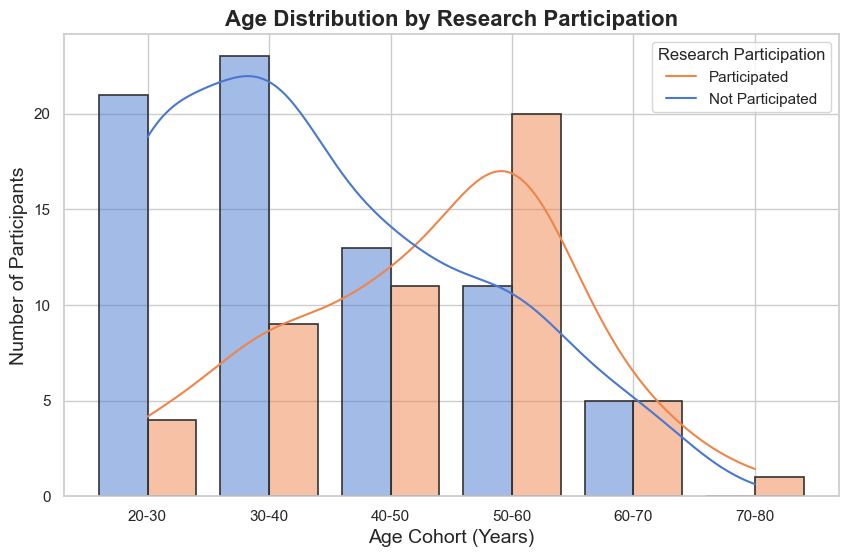

In [23]:
# Plot the distribution of Research Participation and Age
#deprivation_baseline_data[deprivation_baseline_data[var].notna()]
deprivation_baseline_plot = deprivation_baseline_data[deprivation_baseline_data['Age'].notna()].copy()
deprivation_baseline_plot['AgeGroupPlot'] = pd.cut(deprivation_baseline_plot['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=deprivation_baseline_plot, 
    x='AgeGroupPlot', 
    hue='ResearchParticipation', 
    multiple='dodge', 
    kde=True, 
    shrink=0.8, 
    palette='muted',
    edgecolor=".2",
    linewidth=1.2
)

plt.title('Age Distribution by Research Participation', fontsize=16, fontweight='bold')
plt.xlabel('Age Cohort (Years)', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.legend(title='Research Participation', labels=['Participated', 'Not Participated'])

#plt.savefig('C:/Users/rakitic/Desktop/DURHAM/project/0828/FIGURE/age_distribution_research_participation_kde.png', dpi=300, bbox_inches='tight')

plt.show()

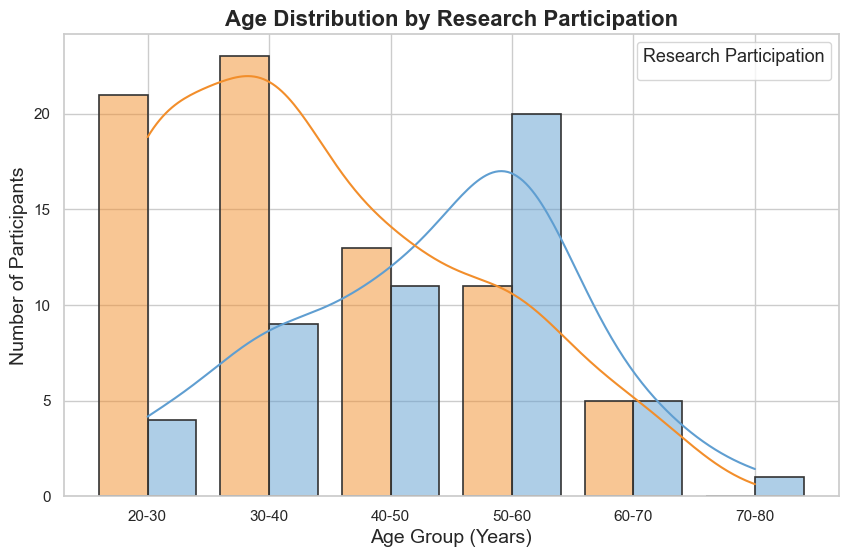

In [24]:
# Filter data to include only non-null ages
deprivation_baseline_plot = deprivation_baseline_data[deprivation_baseline_data['Age'].notna()].copy()
deprivation_baseline_plot['AgeGroupPlot'] = pd.cut(deprivation_baseline_plot['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

sns.set(style="whitegrid")

# Define a specific color palette that matches the count plot
palette = {1: '#5F9ED1', 0: '#F28E2B'}  # Use exact colors from the count plot

plt.figure(figsize=(10, 6))
sns.histplot(
    data=deprivation_baseline_plot, 
    x='AgeGroupPlot', 
    hue='ResearchParticipation', 
    multiple='dodge', 
    kde=True, 
    shrink=0.8, 
    palette=palette,  # Use the defined palette
    edgecolor=".2",
    linewidth=1.2
)

plt.title('Age Distribution by Research Participation', fontsize=16, fontweight='bold')
plt.xlabel('Age Group (Years)', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.legend(title='Research Participation', title_fontsize='13', fontsize='11', loc='best')

plt.show()


In [25]:
deprivation_baseline_plot

,ResearchParticipation,IMDdec,ethnicity,sex,Age,AgeGroup,Socioeconomic_Status,AgeGroupPlot
0,0,5.0,0,0,40.0,0,0,30-40
1,0,2.0,<NA>,0,39.0,0,1,30-40
2,0,1.0,0,1,32.0,0,1,30-40
3,0,4.0,0,0,29.0,1,1,20-30
4,0,4.0,<NA>,0,32.0,0,1,30-40
...,...,...,...,...,...,...,...,...
483,1,10.0,0,1,33.0,0,2,30-40
492,1,10.0,0,0,58.0,2,2,50-60
514,1,7.0,0,1,36.0,0,0,30-40
515,1,NaN,0,0,32.0,0,<NA>,30-40


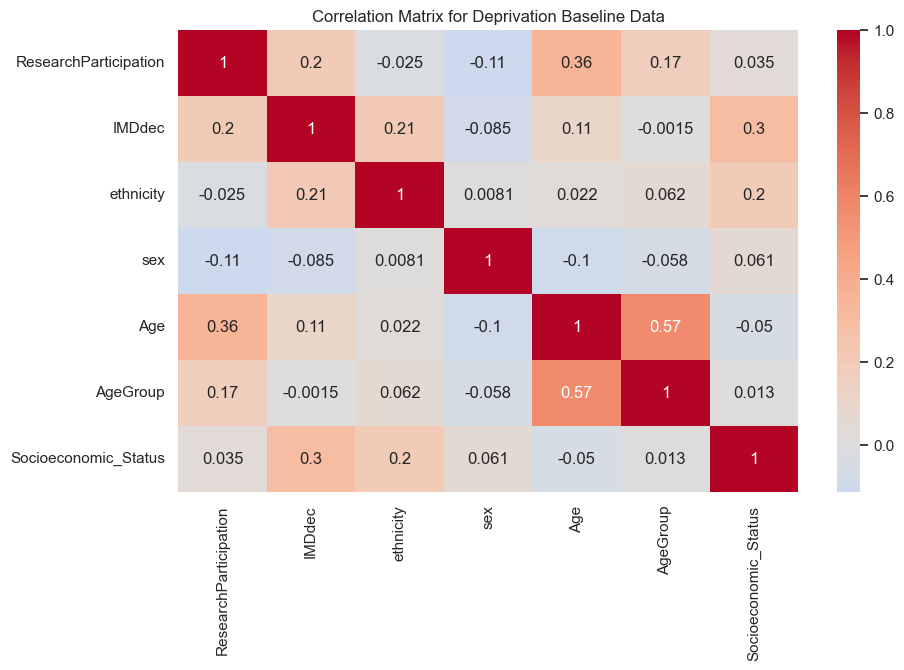

In [26]:
#HEATMAP
correlation_matrix = deprivation_baseline_data.dropna().corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Deprivation Baseline Data')
plt.show()

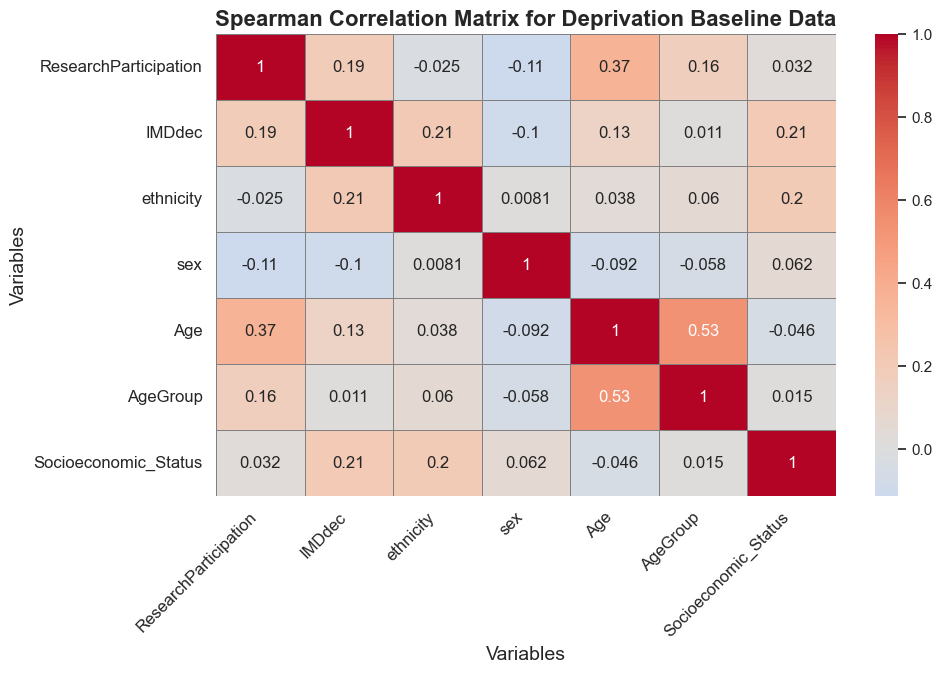

In [27]:
# Compute the Spearman correlation matrix
correlation_matrix_spearman = deprivation_baseline_data.dropna().corr(method='spearman')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', center=0, linewidths=.5, linecolor='gray')

plt.title('Spearman Correlation Matrix for Deprivation Baseline Data', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

#plt.savefig('C:/Users/rakitic/Desktop/DURHAM/project/0828/FIGURE/SpearmanCorrelation.png', dpi=300, bbox_inches='tight')

plt.show()

In [28]:
deprivation_baseline_data.columns

Index(['ResearchParticipation', 'IMDdec', 'ethnicity', 'sex', 'Age',
       'AgeGroup', 'Socioeconomic_Status'],
      dtype='object')

<h1>CHI-SQUARE TEST</h1>

In [29]:
import statsmodels.api as sm

results = {}
for var in numerical_features:
    if var != 'Age':
    #if var == 'IMDdec':
        test_data = deprivation_baseline_data[deprivation_baseline_data[var].notna()]
        contingency_table = pd.crosstab(test_data['ResearchParticipation'], test_data[var])
        table = sm.stats.Table(contingency_table)
        chi2 = table.test_nominal_association()
        results[var] = {
            'Chi2 Statistic': chi2.statistic,
            'P-Value': chi2.pvalue,
            'Degrees of Freedom': chi2.df
        }

In [30]:
results_df = pd.DataFrame(results).T
print(results_df)

                      Chi2 Statistic   P-Value  Degrees of Freedom
ethnicity                   0.067016  0.795732                 1.0
IMDdec                      8.110772  0.523023                 9.0
Socioeconomic_Status        6.738952  0.034408                 2.0
sex                         0.116631  0.732718                 1.0
AgeGroup                   18.160734  0.000114                 2.0


<h1>Modelling</h1>

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
import statsmodels.api as sm

In [32]:
selected_columns = [
    'ResearchParticipation',
    'IMDr', 'IMDdec', 'Return Visit', 'sex', 'Age', 'Source of Referral', 
    'GP Practice', 'PCN', 'Relevant CTT', 'Referral Reason- main motivation', 
    'ethnicity', 'Appointment letter/questionnaires sent', 'Completed Q\'aires received', 
    'Days from referral to appt', 'RiO: Core Docs Completed'
]

In [33]:
df_model = data2_nop[selected_columns]
df_model

,ResearchParticipation,IMDr,IMDdec,Return Visit,sex,Age,Source of Referral,GP Practice,PCN,Relevant CTT,Referral Reason- main motivation,ethnicity,Appointment letter/questionnaires sent,Completed Q'aires received,Days from referral to appt,RiO: Core Docs Completed
0,0,15140.0,5.0,No,F,40.0,Primary,Forest Hall,N West (N Tyne),N.Tyneside,Clinical,White - English/Welsh/Scottish/Northern Irish/...,Yes directly,Yes,6,No
1,0,6438.0,2.0,No,F,39.0,Primary,Newburn,Outer West,Newcastle West,Clinical,Not known/not stated,Yes via post,Yes,15,No
2,0,3138.0,1.0,No,M,32.0,Primary,Newburn,Outer West,Newcastle West,Clinical,White - English/Welsh/Scottish/Northern Irish/...,Yes via post,Yes,15,No
3,0,10676.0,4.0,No,F,29.0,Primary,Newburn,Outer West,Newcastle West,Clinical,White - English/Welsh/Scottish/Northern Irish/...,Yes via post,Yes,28,No
4,0,10540.0,4.0,No,F,32.0,Primary,Forest Hall,N West (N Tyne),N.Tyneside,Clinical,Not known/not stated,Yes via email,Yes,20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,1,31549.0,10.0,No,M,33.0,Self,The Grove MG,Jesmond Lower/Gosforth,NaN,Research,White - English/Welsh/Scottish/Northern Irish/...,Yes via email,Yes,29,Yes
492,1,30017.0,10.0,No,F,58.0,PIC,Forest Hall,N West (N Tyne),N.Tyneside,Research,White - English/Welsh/Scottish/Northern Irish/...,1,1,29,1
514,1,22505.0,7.0,No,M,36.0,Interface,Swarland Avenue S,N West (N Tyne),N.Tyneside,Clinical,White - English/Welsh/Scottish/Northern Irish/...,yes,Yes,14,1
515,1,NaN,NaN,No,F,32.0,Interface,Wellspring MP,N West (N Tyne),N.Tyneside,Clinical,White - English/Welsh/Scottish/Northern Irish/...,Yes,Yes,13,Yes


In [34]:
#----  Add new variables ----
#AgeGroup
df_model['AgeGroup'] = pd.cut(df_model['Age'], bins=[0, 29, 49, 100], labels=['0-29', '30-49', '50+'])
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 29, 49, 100], labels=['0-29', '30-49', '50+'])

#Socioeconomic_Status
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df_model['Socioeconomic_Status'] = pd.cut(df_model['IMDdec'], bins=bins, labels=labels, include_lowest=True)
data['Socioeconomic_Status'] = pd.cut(data['IMDdec'], bins=bins, labels=labels, include_lowest=True)

white_categories = [
    '1','White', 'White - English/Welsh/Scottish/Northern Irish/British Irish','White - Any other white background'
]

df_model['ethnicity_group'] = df_model['ethnicity'].apply(
    lambda x: 'White' if pd.notna(x) and x in white_categories else ('Other-White' if pd.notna(x) else pd.NA)
)
data['ethnicity_group'] = data['ethnicity'].apply(
    lambda x: 'White' if pd.notna(x) and x in white_categories else ('Other-White' if pd.notna(x) else pd.NA)
)

In [35]:
#---- Combine similar categories ----
# Combine categories for 'Appointment letter/questionnaires sent'
df_model['Appointment letter/questionnaires sent'] = df_model['Appointment letter/questionnaires sent'].replace(
    {1: 'Yes directly', 'yes': 'Yes directly', 'Yes': 'Yes directly'}
)
data['Appointment letter/questionnaires sent'] = data['Appointment letter/questionnaires sent'].replace(
    {1: 'Yes directly', 'yes': 'Yes directly', 'Yes': 'Yes directly'}
)

# Combine categories for 'Completed Q\'aires received'
df_model['Completed Q\'aires received'] = df_model['Completed Q\'aires received'].replace(
    {1: 'Yes', 'yes': 'Yes'}
)
data['Completed Q\'aires received'] = data['Completed Q\'aires received'].replace(
    {1: 'Yes', 'yes': 'Yes'}
)

# Combine categories for 'RiO: Core Docs Completed'
df_model['RiO: Core Docs Completed'] = df_model['RiO: Core Docs Completed'].replace(
    {1: 'Yes', 'yes': 'Yes', 'no': 'No'}
)
data['RiO: Core Docs Completed'] = data['RiO: Core Docs Completed'].replace(
    {1: 'Yes', 'yes': 'Yes', 'no': 'No'}
)

# Combine categories for 'Referral Reason- main motivation'
df_model['Referral Reason- main motivation'] = df_model['Referral Reason- main motivation'].replace(
    {'clinical': 'Clinical'}
)
data['Referral Reason- main motivation'] = data['Referral Reason- main motivation'].replace(
    {'clinical': 'Clinical'}
)

In [36]:
categorical_cols = [
    'Return Visit', 'sex', 'Source of Referral', 'GP Practice', 'PCN', 
    'Relevant CTT', 'Referral Reason- main motivation', #'ethnicity', 
    'Appointment letter/questionnaires sent', 'Completed Q\'aires received', 'RiO: Core Docs Completed',
    'AgeGroup','Socioeconomic_Status','ethnicity_group'
]
numerical_cols = ['IMDr', 'Age', 'Days from referral to appt','IMDdec']

In [37]:
missing_values = ["RNA'd", 'UTC', 'NYA', pd.NA, 'to book']
data[numerical_cols] = data[numerical_cols].replace(missing_values, np.nan)
df_model[numerical_cols] = df_model[numerical_cols].replace(missing_values, np.nan)
categorical_missing_values = ["RNA'd", 'UTC', 'NYA', pd.NA]
data[categorical_cols] = data[categorical_cols].replace(categorical_missing_values, np.nan)
df_model[categorical_cols] = df_model[categorical_cols].replace(categorical_missing_values, np.nan)

In [38]:
data['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [39]:
#---- MICE IMPUTATION ----

# Initialize the MICE imputer for numerical features
mice_imputer = IterativeImputer(random_state=0)
mice_imputer.fit(data[numerical_cols])
df_model[numerical_cols] = mice_imputer.transform(df_model[numerical_cols])
#df_model[numerical_cols] = mice_imputer.fit_transform(df_model[numerical_cols])

# Initialize the SimpleImputer for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer.fit(data[categorical_cols])
df_model[categorical_cols] = categorical_imputer.transform(df_model[categorical_cols])
#df_model[categorical_cols] = categorical_imputer.fit_transform(df_model[categorical_cols])

# Convert categorical columns with mixed data types to strings uniformly
for col in categorical_cols:
    df_model[col] = df_model[col].astype(str)

# Reinitialize pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply the preprocessing separately
numerical_data = numerical_pipeline.fit_transform(df_model[numerical_cols])
categorical_data = categorical_pipeline.fit_transform(df_model[categorical_cols])

In [40]:
# Verify shapes of the processed data
print(f"Numerical data shape: {numerical_data.shape}")
print(f"Categorical data shape: {categorical_data.shape}")

# Combine numerical and categorical data
df_processed = pd.concat([
    pd.DataFrame(numerical_data, columns=numerical_cols), 
    pd.DataFrame(categorical_data.toarray(), columns=categorical_pipeline.named_steps['onehot'].get_feature_names_out(categorical_cols))
], axis=1)

# Display the combined data
df_processed.head()

Numerical data shape: (130, 4)
Categorical data shape: (130, 135)


,IMDr,Age,Days from referral to appt,IMDdec,Return Visit_No,Return Visit_Yes,sex_F,sex_M,Source of Referral_Interface,Source of Referral_Lindus,...,RiO: Core Docs Completed_Yes,RiO: Core Docs Completed_declined,AgeGroup_0-29,AgeGroup_30-49,AgeGroup_50+,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Medium,ethnicity_group_Other-White,ethnicity_group_White
0,0.246556,-0.163917,-1.101320,0.188609,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.695902,-0.238863,-0.771209,-0.872849,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.053305,-0.763483,-0.771209,-1.226668,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.236911,-0.988321,-0.294381,-0.165210,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.251641,-0.763483,-0.587813,-0.165210,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
df_processed

,IMDr,Age,Days from referral to appt,IMDdec,Return Visit_No,Return Visit_Yes,sex_F,sex_M,Source of Referral_Interface,Source of Referral_Lindus,...,RiO: Core Docs Completed_Yes,RiO: Core Docs Completed_declined,AgeGroup_0-29,AgeGroup_30-49,AgeGroup_50+,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Medium,ethnicity_group_Other-White,ethnicity_group_White
0,0.246556,-0.163917,-1.101320,0.188609,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.695902,-0.238863,-0.771209,-0.872849,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.053305,-0.763483,-0.771209,-1.226668,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.236911,-0.988321,-0.294381,-0.165210,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.251641,-0.763483,-0.587813,-0.165210,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2.023712,-0.688538,-0.257702,1.957705,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
126,1.857790,1.185107,-0.257702,1.957705,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
127,1.044213,-0.463700,-0.807888,0.896247,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
128,-0.356321,-0.763483,-0.844567,-0.358372,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
X = df_processed
y = df_model['ResearchParticipation']

In [43]:
#---- Feature Selection ----

# Method 1: Correlation-based feature selection (for numerical features)
correlations = X.corrwith(y)
print("Correlations:\n", correlations)

# Check distribution of features with NaN correlations
nan_features = correlations[correlations.isna()].index.tolist()
print(f"Features with NaN correlations: {nan_features}")

# Check the distribution of these features in the target variable
for feature in nan_features:
    print(f"Value distribution of {feature}:")
    print(X[feature].value_counts())

# Drop features with NaN correlations
X = X.drop(columns=nan_features)

# Recalculate correlations
correlations = X.corrwith(y)
print("Recalculated correlations:\n", correlations)

Correlations:
 IMDr                          -0.004327
Age                            0.251357
Days from referral to appt    -0.050889
IMDdec                        -0.007497
Return Visit_No               -0.201802
                                 ...   
Socioeconomic_Status_High      0.009101
Socioeconomic_Status_Low      -0.014691
Socioeconomic_Status_Medium    0.009101
ethnicity_group_Other-White    0.010209
ethnicity_group_White         -0.010209
Length: 139, dtype: float64
Features with NaN correlations: ['GP Practice_Battle Hill', 'GP Practice_Bedlington MG', 'GP Practice_Belford MP', 'GP Practice_Brampton MC', 'GP Practice_Bridge View MG', 'GP Practice_Cleadon Park Primary Care', 'GP Practice_Concord MP', 'GP Practice_Cramlington MG', 'GP Practice_Crawcrook MC', 'GP Practice_Denton Turret MC', 'GP Practice_Hadrian HC', 'GP Practice_Jesmond Health Partnership (Osborne Rd & Holly MG)', 'GP Practice_Lane End S', 'GP Practice_Maryport Group P', 'GP Practice_Millfield MG', 'GP Practi

In [44]:
# Set a threshold for class imbalance
imbalance_threshold = 0.95

imbalanced_features = []

for column in X.columns:
    # Check if the feature is categorical or binary
    if X[column].dtype == 'object' or X[column].dtype.name == 'category' or (X[column].dtype == 'int64' and X[column].nunique() == 2) or (X[column].dtype == 'float64' and X[column].nunique() == 2):
        # Calculate the proportion of the most common value
        top_freq = X[column].value_counts(normalize=True).max()
        if top_freq > imbalance_threshold:
            imbalanced_features.append(column)

print(f"Features with high class imbalance: {imbalanced_features}")

# Drop the imbalanced features from the dataset
X = X.drop(columns=imbalanced_features)

Features with high class imbalance: ['Return Visit_No', 'Return Visit_Yes', 'Source of Referral_Lindus', 'Source of Referral_PIC', 'Source of Referral_Tertiary', 'GP Practice_49 Marine Ave S', 'GP Practice_Alnwick MG', 'GP Practice_Bewicke MC', 'GP Practice_Coquet MG', 'GP Practice_Cruddas Park', 'GP Practice_Ellison View S', 'GP Practice_Elsdon Park Surgery', 'GP Practice_Gosforth Memorial MC', 'GP Practice_Haydon Bridge & Allendale MP', 'GP Practice_Herrington MC', 'GP Practice_Mallard MP', 'GP Practice_Marsden Rd HC', 'GP Practice_NK', 'GP Practice_Park MG', 'GP Practice_Park Rd', 'GP Practice_Pelaw', 'GP Practice_Priory MG', 'GP Practice_Roseworth S', 'GP Practice_Seaton Park MG', 'GP Practice_St Albans MG', 'GP Practice_The Bridges MP', 'GP Practice_The Grove MG', 'GP Practice_W Bay HC', 'PCN_Coalfields', "PCN_E G'head", "PCN_G'head Central S", 'PCN_Jesmond Lower/Gosforth', 'PCN_N Gosforth', 'PCN_NK', 'PCN_Northumbria ', 'PCN_South (Styne)', 'PCN_W Bay', 'PCN_Wansbeck ', 'PCN_Well

In [45]:
correlations = X.corrwith(y)
sorted_correlations = correlations.sort_values(ascending=False)
print("Sorted correlations (Descending):\n", sorted_correlations)

Sorted correlations (Descending):
 Relevant CTT_NK                                         0.353736
RiO: Core Docs Completed_Yes                            0.331123
Referral Reason- main motivation_Research               0.283476
Age                                                     0.251357
Source of Referral_R+Me                                 0.221321
AgeGroup_50+                                            0.210865
GP Practice_Village Green                               0.201802
Source of Referral_Secondary                            0.199774
PCN_Wallsend                                            0.125862
Appointment letter/questionnaires sent_Yes directly     0.063099
Appointment letter/questionnaires sent_Yes via post     0.056190
sex_F                                                   0.036875
ethnicity_group_Other-White                             0.010209
Socioeconomic_Status_Medium                             0.009101
Socioeconomic_Status_High                              

In [46]:
# Method 2: Recursive Feature Elimination (RFE)
model = RandomForestClassifier(n_estimators=100, random_state=2)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

print("Features selected by RFE:\n", X.columns[fit.support_])

Features selected by RFE:
 Index(['IMDr', 'Age', 'Days from referral to appt', 'IMDdec',
       'PCN_N West (N Tyne)', 'Referral Reason- main motivation_Clinical',
       'Appointment letter/questionnaires sent_Yes via email',
       'RiO: Core Docs Completed_Yes', 'AgeGroup_0-29', 'AgeGroup_50+'],
      dtype='object')


Features selected by RandomForest:
 Index(['Age', 'Days from referral to appt', 'IMDr', 'IMDdec',
       'RiO: Core Docs Completed_Yes', 'AgeGroup_50+', 'AgeGroup_0-29',
       'Appointment letter/questionnaires sent_Yes via email',
       'Referral Reason- main motivation_Research', 'sex_F'],
      dtype='object')


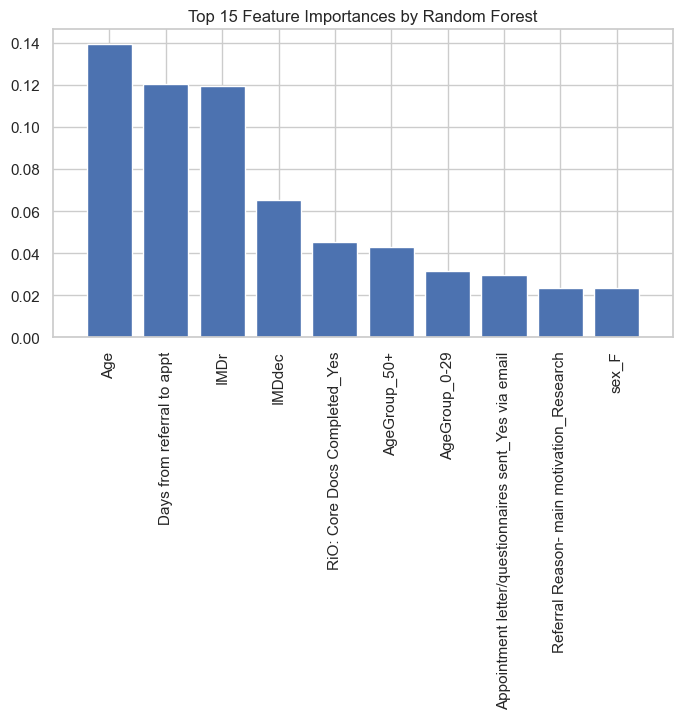

In [47]:
# Method 3: Feature selection based on RandomForest
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Features selected by RandomForest:\n", X.columns[indices][:10])

# Display top 15 features
top_n = 10
plt.figure(figsize=(8, 4))
plt.title("Top 15 Feature Importances by Random Forest")
plt.bar(range(top_n), importances[indices][:top_n], align="center")
plt.xticks(range(top_n), X.columns[indices][:top_n], rotation=90)
plt.xlim([-1, top_n])
plt.show()

In [48]:
from itertools import combinations
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error

def calculate_bic(n, mse, k):
    """Calculate the BIC (Bayesian Information Criterion)"""
    return n * np.log(mse) + k * np.log(n)

def forward_selection_bic(X, y):
    n_samples = X.shape[0]
    remaining_features = list(X.columns)
    selected_features = []
    best_bic = np.inf

    # Ensure that X and y are aligned
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    while remaining_features:
        bic_with_candidates = []
        for candidate in remaining_features:
            # Fit the model with the selected features + the candidate feature
            features_to_try = selected_features + [candidate]
            X_subset = X[features_to_try]
            model = sm.OLS(y, sm.add_constant(X_subset)).fit()
            mse = mean_squared_error(y, model.predict(sm.add_constant(X_subset)))
            bic = calculate_bic(n_samples, mse, len(features_to_try) + 1)  # +1 for the intercept
            
            bic_with_candidates.append((bic, candidate))

        # Sort by BIC and choose the best candidate
        bic_with_candidates.sort()
        best_new_bic, best_candidate = bic_with_candidates[0]

        # If the best new BIC is better than the best we've seen, update
        if best_new_bic < best_bic:
            best_bic = best_new_bic
            selected_features.append(best_candidate)
            remaining_features.remove(best_candidate)
        else:
            # If no improvement, stop the process
            break
    
    return selected_features, best_bic

# Perform forward selection based on BIC
selected_features, best_bic = forward_selection_bic(X, y)
print("Features selected by BIC:", selected_features)
print("Best BIC value:", best_bic)

Features selected by BIC: ['Age', 'RiO: Core Docs Completed_Yes']
Best BIC value: -202.63621272611735


In [49]:
selected_features = ['Age', 'RiO: Core Docs Completed_Yes',                      
                     'IMDdec','Source of Referral_Primary']

In [50]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold,cross_val_predict,GridSearchCV

#---- Find model parameters ----

X_selected = X[selected_features]
log_reg = LogisticRegression()

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Solvers that support L1 and elasticnet regularization
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_selected, y)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

best_params = grid_search.best_params_

Best parameters found:  {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy:  0.7076923076923076


In [51]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# Define the random seed for reproducibility
random_seed = 4321

# Initialize the Logistic Regression model with the best parameters and random seed
log = LogisticRegression(**best_params, random_state=random_seed)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)

# Calculate confusion matrix
y_pred = cross_val_predict(log, X_selected, y, cv=cv)
conf_matrix = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y, y_pred))

Confusion Matrix:
[[64 15]
 [23 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        79
           1       0.65      0.55      0.60        51

    accuracy                           0.71       130
   macro avg       0.69      0.68      0.68       130
weighted avg       0.70      0.71      0.70       130



In [52]:
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy for each class
accuracy_class_0 = conf_matrix[0, 0] / sum(conf_matrix[0, :])
accuracy_class_1 = conf_matrix[1, 1] / sum(conf_matrix[1, :])

print("\nAccuracy for Not Participated (Class 0): {:.2f}".format(accuracy_class_0))
print("Accuracy for Participated (Class 1): {:.2f}".format(accuracy_class_1))

# Print the full classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))


Confusion Matrix:
[[64 15]
 [23 28]]

Accuracy for Not Participated (Class 0): 0.81
Accuracy for Participated (Class 1): 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        79
           1       0.65      0.55      0.60        51

    accuracy                           0.71       130
   macro avg       0.69      0.68      0.68       130
weighted avg       0.70      0.71      0.70       130



In [53]:
log.fit(X_selected, y)

# Get the model coefficients
coefficients = log.coef_[0]
intercept = log.intercept_

# Print the model coefficients
print("\nModel Coefficients:")
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Model Coefficients:
Intercept: [-1.79827179]
Coefficients: [ 0.82257362  1.78529091  0.2731153  -0.68015176]


In [54]:
# Convert y and y_pred_prob to numpy arrays
y = np.array(y)
y_pred_prob = cross_val_predict(log, X_selected, y, cv=cv, method='predict_proba')[:, 1]

# Calculate and print the ROC AUC
y_pred_prob = cross_val_predict(log, X_selected, y, cv=cv, method='predict_proba')[:, 1]
roc_auc = roc_auc_score(y, y_pred_prob)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.7807


In [55]:
# Bootstrap to calculate 95% confidence interval for ROC AUC
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_aucs = []
rng = np.random.RandomState(rng_seed)

for i in range(n_bootstraps):
    # bootstrap by sampling with replacement
    indices = rng.randint(0, len(y), len(y))
    if len(np.unique(y[indices])) < 2:
        continue

    score = roc_auc_score(y[indices], y_pred_prob[indices])
    bootstrapped_aucs.append(score)

# Calculate the mean and standard deviation of bootstrapped AUCs
mean_auc = np.mean(bootstrapped_aucs)
std_auc = np.std(bootstrapped_aucs)

# Calculate the lower and upper bound of the confidence interval
sorted_aucs = np.sort(bootstrapped_aucs)
ci_lower = sorted_aucs[int(0.025 * len(sorted_aucs))]
ci_upper = sorted_aucs[int(0.975 * len(sorted_aucs))]

print(f"Mean Roc_auc: {mean_auc:.4f} ± {std_auc:.4f}")
print(f"95% CI for ROC AUC: [{ci_lower:.4f} - {ci_upper:.4f}]")

Mean Roc_auc: 0.7831 ± 0.0402
95% CI for ROC AUC: [0.7082 - 0.8622]


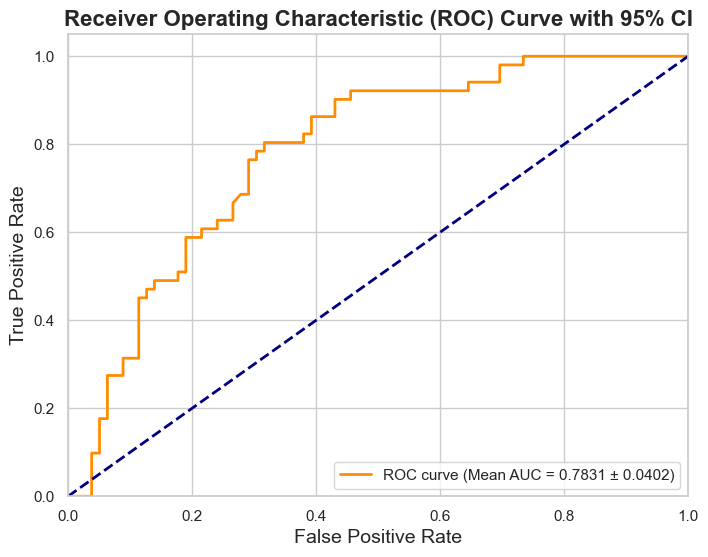

In [56]:
sns.set(style="whitegrid")

# Plot the ROC curve with the updated legend
fpr, tpr, _ = roc_curve(y, y_pred_prob)
plt.figure(figsize=(8, 6))

# Plot the ROC curve with a consistent color palette and line style
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (Mean AUC = {mean_auc:.4f} ± {std_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve with 95% CI', fontsize=16, fontweight='bold')

plt.legend(loc="lower right", fontsize=11, title_fontsize='13')

#plt.savefig('C:/Users/rakitic1/Desktop/DURHAM2024/Project/project0803/figure/ROC_Curve.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [57]:
# Pseudo R-squ
X_selected_const = sm.add_constant(X_selected)

model_sm = sm.Logit(y, X_selected_const)
result_sm = model_sm.fit()
print(result_sm.summary())


Optimization terminated successfully.
         Current function value: 0.531477
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  130
Model:                          Logit   Df Residuals:                      125
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                  0.2065
Time:                        12:45:45   Log-Likelihood:                -69.092
converged:                       True   LL-Null:                       -87.070
Covariance Type:            nonrobust   LLR p-value:                 2.955e-07
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.8796      0.665     -2.825      0.005

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant to the features
X_with_const = sm.add_constant(X[selected_features])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

                        Feature       VIF
0                         const  6.042817
1                           Age  1.053384
2  RiO: Core Docs Completed_Yes  1.014018
3                        IMDdec  1.067554
4    Source of Referral_Primary  1.073082


In [59]:
participated_mean_IMDdec = df_model[df_model['ResearchParticipation'] == 1]['IMDdec'].mean()
participated_std_IMDdec = df_model[df_model['ResearchParticipation'] == 1]['IMDdec'].std()

# Calculate mean and standard deviation for those who did not participate in research
not_participated_mean_IMDdec = df_model[df_model['ResearchParticipation'] == 0]['IMDdec'].mean()
not_participated_std_IMDdec = df_model[df_model['ResearchParticipation'] == 0]['IMDdec'].std()

# Display the results
print(f"Mean IMDdec for Participated: {participated_mean_IMDdec:.2f}")
print(f"Standard Deviation of IMDdec for Participated: {participated_std_IMDdec:.2f}")

print(f"Mean IMDdec for Not Participated: {not_participated_mean_IMDdec:.2f}")
print(f"Standard Deviation of IMDdec for Not Participated: {not_participated_std_IMDdec:.2f}")

Mean IMDdec for Participated: 5.23
Standard Deviation of IMDdec for Participated: 2.95
Mean IMDdec for Not Participated: 3.98
Standard Deviation of IMDdec for Not Participated: 2.67


In [60]:
participated_mean_IMDdec = df_model[df_model['ResearchParticipation'] == 1]['Age'].mean()
participated_std_IMDdec = df_model[df_model['ResearchParticipation'] == 1]['Age'].std()

# Calculate mean and standard deviation for those who did not participate in research
not_participated_mean_IMDdec = df_model[df_model['ResearchParticipation'] == 0]['Age'].mean()
not_participated_std_IMDdec = df_model[df_model['ResearchParticipation'] == 0]['Age'].std()

# Display the results
print(f"Mean Age for Participated: {participated_mean_IMDdec:.2f}")
print(f"Standard Deviation of Age for Participated: {participated_std_IMDdec:.2f}")

print(f"Mean Age for Not Participated: {not_participated_mean_IMDdec:.2f}")
print(f"Standard Deviation of Age for Not Participated: {not_participated_std_IMDdec:.2f}")

Mean Age for Participated: 48.54
Standard Deviation of Age for Participated: 11.74
Mean Age for Not Participated: 38.08
Standard Deviation of Age for Not Participated: 12.84
